# Comparing Encoder-Decoders Analysis

### Model Architecture

In [1]:
report_files = ["/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing6_bow_200_512_04drb/encdec_noing6_bow_200_512_04drb.json", "/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing10_bow_200_512_04drb/encdec_noing10_bow_200_512_04drb.json", "/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing15_bow_200_512_04drb/encdec_noing15_bow_200_512_04drb.json", "/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing23_bow_200_512_04drb/encdec_noing23_bow_200_512_04drb.json"]
log_files = ["/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing6_bow_200_512_04drb/encdec_noing6_bow_200_512_04drb_logs.json", "/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing10_bow_200_512_04drb/encdec_noing10_bow_200_512_04drb_logs.json", "/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing15_bow_200_512_04drb/encdec_noing15_bow_200_512_04drb_logs.json", "/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing23_bow_200_512_04drb/encdec_noing23_bow_200_512_04drb_logs.json"]
reports = []
logs = []
import json
import matplotlib.pyplot as plt
import numpy as np

for report_file in report_files:
    with open(report_file) as f:
        reports.append((report_file.split('/')[-1].split('.json')[0], json.loads(f.read())))
for log_file in log_files:
    with open(log_file) as f:
        logs.append((log_file.split('/')[-1].split('.json')[0], json.loads(f.read())))
        
for report_name, report in reports:
    print '\n', report_name, '\n'
    print 'Encoder: \n', report['architecture']['encoder']
    print 'Decoder: \n', report['architecture']['decoder']
    


encdec_noing6_bow_200_512_04drb 

Encoder: 
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Mean
  (3): nn.Linear(200 -> 512)
  (4): nn.Replicate
}
Decoder: 
nn.gModule

encdec_noing10_bow_200_512_04drb 

Encoder: 
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Mean
  (3): nn.Linear(200 -> 512)
  (4): nn.Replicate
}
Decoder: 
nn.gModule

encdec_noing15_bow_200_512_04drb 

Encoder: 
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Mean
  (3): nn.Linear(200 -> 512)
  (4): nn.Replicate
}
Decoder: 
nn.gModule

encdec_noing23_bow_200_512_04drb 

Encoder: 
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Mean
  (3): nn.Linear(200 -> 512)
  (4): nn.Replicate
}
Decoder: 
nn.gModule


### Perplexity on Each Dataset

Model,Train Perplexity,Valid Perplexity,Test Perplexity
encdec_noing6_bow_200_512_04drb,1.8576546662,794.18428089,1009.45163985
encdec_noing10_bow_200_512_04drb,1.7752875281,858.775111277,1154.4081424
encdec_noing15_bow_200_512_04drb,1.8018126954,909.033889454,1485.06427136
encdec_noing23_bow_200_512_04drb,1.75150558043,912.06892427,1331.01870967


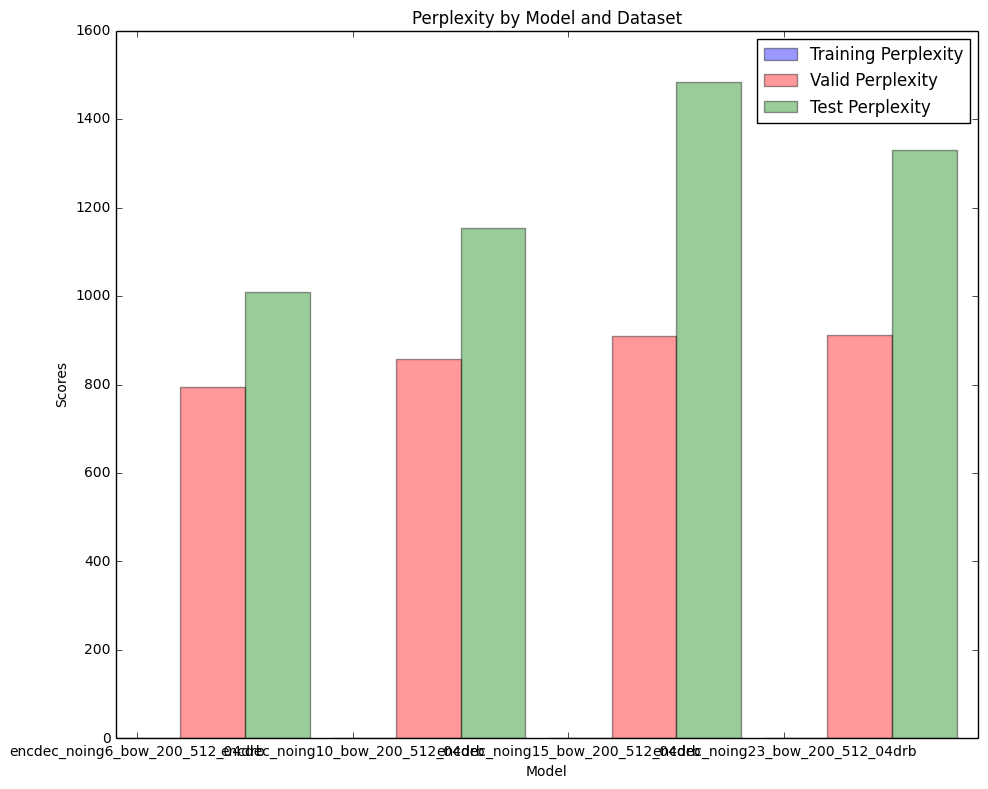

In [2]:
%matplotlib inline
from IPython.display import HTML, display

def display_table(data):
    display(HTML(
        u'<table><tr>{}</tr></table>'.format(
            u'</tr><tr>'.join(
                u'<td>{}</td>'.format('</td><td>'.join(unicode(_) for _ in row)) for row in data)
            )
    ))

def bar_chart(data):
    n_groups = len(data)
    
    train_perps = [d[1] for d in data]
    valid_perps = [d[2] for d in data]
    test_perps = [d[3] for d in data]
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    index = np.arange(n_groups)
    bar_width = 0.3

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    train_bars = plt.bar(index, train_perps, bar_width,
                     alpha=opacity,
                     color='b',
                     error_kw=error_config,
                     label='Training Perplexity')

    valid_bars = plt.bar(index + bar_width, valid_perps, bar_width,
                     alpha=opacity,
                     color='r',
                     error_kw=error_config,
                     label='Valid Perplexity')
    test_bars = plt.bar(index + 2*bar_width, test_perps, bar_width,
                     alpha=opacity,
                     color='g',
                     error_kw=error_config,
                     label='Test Perplexity')

    plt.xlabel('Model')
    plt.ylabel('Scores')
    plt.title('Perplexity by Model and Dataset')
    plt.xticks(index + bar_width / 3, [d[0] for d in data])
    plt.legend()

    plt.tight_layout()
    plt.show()

data = [['<b>Model</b>', '<b>Train Perplexity</b>', '<b>Valid Perplexity</b>', '<b>Test Perplexity</b>']]

for rname, report in reports:
    data.append([rname, report['train_perplexity'], report['valid_perplexity'], report['test_perplexity']])

display_table(data)
bar_chart(data[1:])


### Loss vs. Epoch

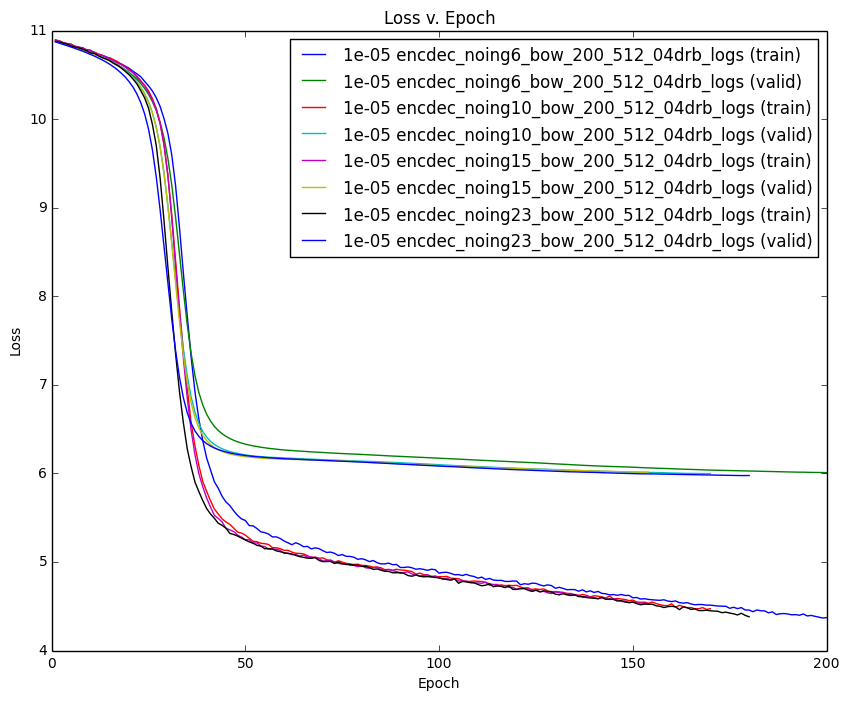

In [3]:
%matplotlib inline
plt.figure(figsize=(10, 8))
for rname, l in logs:
    for k in l.keys():
        plt.plot(l[k][0], l[k][1], label=str(k) + ' ' + rname + ' (train)')
        plt.plot(l[k][0], l[k][2], label=str(k) + ' ' + rname + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

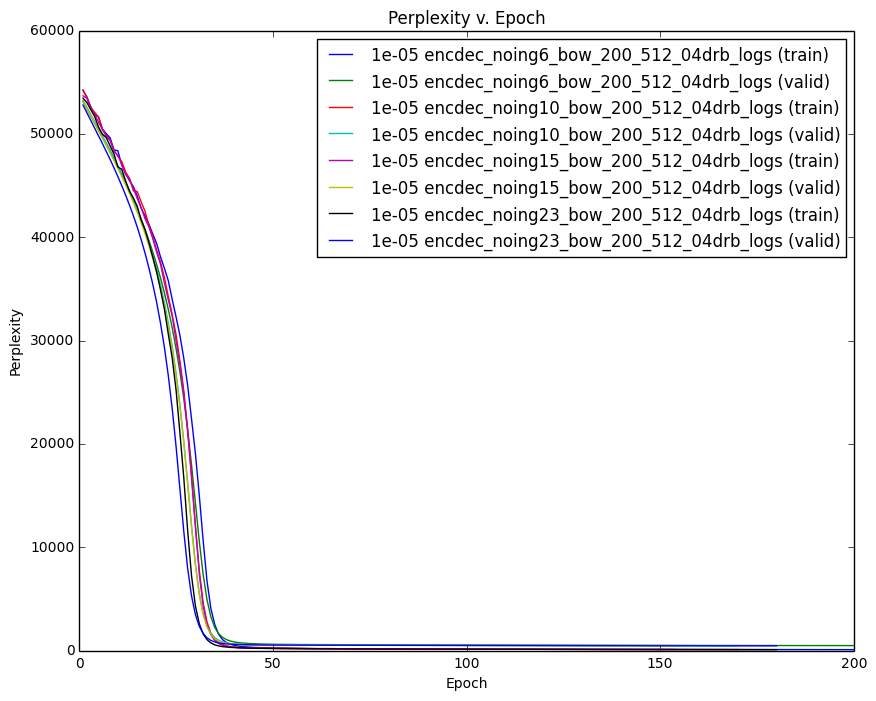

In [4]:
%matplotlib inline
plt.figure(figsize=(10, 8))
for rname, l in logs:
    for k in l.keys():
        plt.plot(l[k][0], l[k][3], label=str(k) + ' ' + rname + ' (train)')
        plt.plot(l[k][0], l[k][4], label=str(k) + ' ' + rname + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample, best_bleu=None):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    if best_bleu is not None:
        cbm = ' '.join([w for w in best_bleu['best_match'].split(' ') if w != '<mask>'])
        print('Closest BLEU Match: ' + cbm + '\n')
        print('Closest BLEU Score: ' + str(best_bleu['best_score']) + '\n')
    print('\n')
    
def display_sample(samples, best_bleu=False):
    for enc_input in samples:
        data = []
        for rname, sample in samples[enc_input]:
            gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
            data.append([rname, '<b>Generated: </b>' + sample['generated']])
            if best_bleu:
                cbm = ' '.join([w for w in sample['best_match'].split(' ') if w != '<mask>'])
                data.append([rname, '<b>Closest BLEU Match: </b>' + cbm + ' (Score: ' + str(sample['best_score']) + ')'])
        data.insert(0, ['<u><b>' + enc_input + '</b></u>', '<b>True: ' + gold+ '</b>'])
        display_table(data)

def process_samples(samples):
    # consolidate samples with identical inputs
    result = {}
    for rname, t_samples, t_cbms in samples:
        for i, sample in enumerate(t_samples):
            enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
            if t_cbms is not None:
                sample.update(t_cbms[i])
            if enc_input in result:
                result[enc_input].append((rname, sample))
            else:
                result[enc_input] = [(rname, sample)]
    return result


   
    


In [6]:
samples = process_samples([(rname, r['train_samples'], r['best_bleu_matches_train'] if 'best_bleu_matches_train' in r else None) for (rname, r) in reports])
display_sample(samples, best_bleu='best_bleu_matches_train' in reports[1][1])


hidden valley pinwheel sandwiches,"True: chop your green pepper , red pepper , sweet onion , and carrots up . put your carrots off to the side ."
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"


mug with cinnamon oatmeal struesel topping,"True: to make the apple - cranberry relish : peel , core , and chop the apples into 1 / 4 - inch"
encdec_noing6_bow_200_512_04drb,"Generated: preheat oven to a large . . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 450º . place a large baking sheet into the oven . in a large bowl , toss together (Score: 31.1079728148)"


french fry stuffed chili enchiladas,"True: start your rice , i use a rice cooker . when nearly finished ( or actually finished )"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: preheat oven to . . . . , and . , and , and , and , and , and"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: heat the oil in a skillet over medium heat . in a bowl , combine the coconut flour , (Score: 0)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


- minute healthy strawberry frozen yogurt,True: preheat oven to 350 brown beef in skillet & add taco seasoning . cook as directed on seasoning packet spray an
encdec_noing6_bow_200_512_04drb,"Generated: in a large bowl , and . in a large bowl , and . in a large bowl , and . in"
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"


5 - minute healthy strawberry frozen yogurt,True: preheat oven to 350 brown beef in skillet & add taco seasoning . cook as directed on seasoning packet spray an
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


savory french omelet,"True: combine the cornmeal , flour , sugar , mustard , baking powder and salt , mixing well . add the milk , egg"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


pizza zacineti breadsticks,"True: using a mixer with a paddle , cream together the butter , sugar and eggs until smooth . add the vanilla and zest and combine"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: preheat oven to . . . . , and . , and , and , and , and , and"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: heat the oil in a skillet over medium heat . in a bowl , combine the coconut flour , (Score: 0)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


coffee cake in a mug with cinnamon oatmeal struesel topping,"True: to make the apple - cranberry relish : peel , core , and chop the apples into 1 / 4 - inch"
encdec_noing10_bow_200_512_04drb,"Generated: preheat oven to to a large . . . , and . , and . , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: heat the oil in a skillet over medium heat . in a bowl , combine the coconut flour , (Score: 0)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


In [7]:
samples = process_samples([(rname, r['valid_samples'], r['best_bleu_matches_valid'] if 'best_bleu_matches_valid' in r else None) for (rname, r) in reports])
display_sample(samples, best_bleu='best_bleu_matches_valid' in reports[1][1])


hidden valley pinwheel sandwiches,"True: mix cream cheese , dressing mix and onions until blended . spread on tortillas . blot"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"


mug with cinnamon oatmeal struesel topping,"True: place 1 tablespoon of room temperature butter in mug . if cold , place in microwave"
encdec_noing6_bow_200_512_04drb,"Generated: preheat oven to a large . . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 450º . place a large baking sheet into the oven . in a large bowl , toss together (Score: 31.1079728148)"


french fry stuffed chili enchiladas,True: preheat oven and bake french fries as directed on bag . take your flour tortillas and heat
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: preheat oven to . . . . , and . , and , and , and , and , and"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: heat the oil in a skillet over medium heat . in a bowl , combine the coconut flour , (Score: 0)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


- minute healthy strawberry frozen yogurt,"True: add the frozen strawberries , agave nectar ( or honey ) , yogurt and lemon juice to the"
encdec_noing6_bow_200_512_04drb,"Generated: in a large bowl , and . in a large bowl , and . in a large bowl , and . in"
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"


5 - minute healthy strawberry frozen yogurt,"True: add the frozen strawberries , agave nectar ( or honey ) , yogurt and lemon juice to the"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


savory french omelet,"True: in a large skillet , fry bacon until crisp . crumble cooked bacon ; ."
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


pizza zacineti breadsticks,"True: in a bowl , dissolve the yeast with lukewarm and sugar for about 5 minutes , then add flour , salt and"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: preheat oven to . . . . , and . , and , and , and , and , and"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: heat the oil in a skillet over medium heat . in a bowl , combine the coconut flour , (Score: 0)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


coffee cake in a mug with cinnamon oatmeal struesel topping,"True: place 1 tablespoon of room temperature butter in mug . if cold , place in microwave"
encdec_noing10_bow_200_512_04drb,"Generated: preheat oven to to a large . . . , and . , and . , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: heat the oil in a skillet over medium heat . in a bowl , combine the coconut flour , (Score: 0)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


In [8]:
samples = process_samples([(rname, r['test_samples'], r['best_bleu_matches_test'] if 'best_bleu_matches_test' in r else None) for (rname, r) in reports])
display_sample(samples, best_bleu='best_bleu_matches_test' in reports[1][1])

fancy hot dogs,True: 1 melt butter in a large skillet ( cast iron works well for this purpose
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


"smoked salmon , avocado , dill and parsley mayo sandwich",True: mash the lemon juice and avocado with dill and parsley mayo . spoon over a slice of bread and
encdec_noing10_bow_200_512_04drb,"Generated: preheat oven to to . . . . , and . , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: heat the oil in a skillet over medium heat . in a bowl , combine the coconut flour , (Score: 0)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


marty 's loosemeat sandwich,"True: in a medium skillet over medium heat , cook the ground beef until evenly browned ; drain"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


", dill and parsley mayo sandwich",True: mash the lemon juice and avocado with dill and parsley mayo . spoon over a slice of bread and
encdec_noing6_bow_200_512_04drb,"Generated: preheat oven to a large . . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 450º . place a large baking sheet into the oven . in a large bowl , toss together (Score: 31.1079728148)"


saute ? ed mushrooms,True: 1 . cook shiitake mushrooms in a single layer in 1 1 / 2 tbsp . hot oil in a 10 - to
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"


healthy oatmeal cookies,"True: preheat oven to 350 degrees . in a medium bowl , whisk together flours and baking powder ; set aside . in"
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


mexican hummus,True: position the knife blade in a food processor bowl . drop the garlic through the food chute with the processor running ; process 3 seconds
encdec_noing6_bow_200_512_04drb,"Generated: in a large a large bowl , and . in a large bowl , and . in a large bowl , and ."
encdec_noing6_bow_200_512_04drb,"Closest BLEU Match: in a medium bowl , combine the almond meal , flaxseed , salt , and baking soda . in a large bowl , (Score: 28.4178263259)"
encdec_noing10_bow_200_512_04drb,"Generated: in a large bowl , and . , and , and , and , and , and , and , and , and ,"
encdec_noing10_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 21.1650849295)"
encdec_noing15_bow_200_512_04drb,"Generated: in a large , and . . . . . . . . . ."
encdec_noing15_bow_200_512_04drb,"Closest BLEU Match: preheat oven to 350 . salt & pepper chicken . in a large , (Score: 12.2196674815)"
encdec_noing23_bow_200_512_04drb,"Generated: in a large bowl , and , and , and , and , and , and , and , and , and , and ,"
encdec_noing23_bow_200_512_04drb,"Closest BLEU Match: 1 . combine chicken , lime juice , and 1 tbsp . curry powder in a large bowl , and (Score: 20.6148720148)"


### BLEU Analysis

In [9]:
def print_bleu(blue_structs):
    data= [['<b>Model</b>', '<b>Overall Score</b>','<b>1-gram Score</b>','<b>2-gram Score</b>','<b>3-gram Score</b>','<b>4-gram Score</b>']]
    for rname, blue_struct in blue_structs:
        data.append([rname, blue_struct['score'], blue_struct['components']['1'], blue_struct['components']['2'], blue_struct['components']['3'], blue_struct['components']['4']])
    display_table(data)

In [10]:
# Training Set BLEU Scores
print_bleu([(rname, report['train_bleu']) for (rname, report) in reports])

Model,Overall Score,1-gram Score,2-gram Score,3-gram Score,4-gram Score
encdec_noing6_bow_200_512_04drb,0,20.3,2.3,0,0
encdec_noing10_bow_200_512_04drb,0,18.7,2.3,0,0
encdec_noing15_bow_200_512_04drb,0,13.7,2.3,0,0
encdec_noing23_bow_200_512_04drb,0,14.8,1.7,0,0


In [11]:
# Validation Set BLEU Scores
print_bleu([(rname, report['valid_bleu']) for (rname, report) in reports])

Model,Overall Score,1-gram Score,2-gram Score,3-gram Score,4-gram Score
encdec_noing6_bow_200_512_04drb,0,18.7,3.4,0.6,0
encdec_noing10_bow_200_512_04drb,0,15.4,2.9,0.6,0
encdec_noing15_bow_200_512_04drb,0,14.8,2.9,0.6,0
encdec_noing23_bow_200_512_04drb,0,12.6,2.3,0.6,0


In [12]:
# Test Set BLEU Scores
print_bleu([(rname, report['test_bleu']) for (rname, report) in reports])

Model,Overall Score,1-gram Score,2-gram Score,3-gram Score,4-gram Score
encdec_noing6_bow_200_512_04drb,0,20.9,6.9,1.2,0
encdec_noing10_bow_200_512_04drb,0,15.4,5.1,0.6,0
encdec_noing15_bow_200_512_04drb,0,15.4,4.6,0.6,0
encdec_noing23_bow_200_512_04drb,0,12.1,4.6,0.6,0


In [13]:
# All Data BLEU Scores
print_bleu([(rname, report['combined_bleu']) for (rname, report) in reports])

Model,Overall Score,1-gram Score,2-gram Score,3-gram Score,4-gram Score
encdec_noing6_bow_200_512_04drb,0,20,4.2,0.6,0
encdec_noing10_bow_200_512_04drb,0,16.5,3.4,0.4,0
encdec_noing15_bow_200_512_04drb,0,14.7,3.2,0.4,0
encdec_noing23_bow_200_512_04drb,0,13.2,2.9,0.4,0


### N-pairs BLEU Analysis

This analysis randomly samples 1000 pairs of generations/ground truths and treats them as translations, giving their BLEU score. We can expect very low scores in the ground truth and high scores can expose hyper-common generations

In [14]:
# Training Set BLEU n-pairs Scores
print_bleu([(rname, report['n_pairs_bleu_train']) for (rname, report) in reports])

Model,Overall Score,1-gram Score,2-gram Score,3-gram Score,4-gram Score
encdec_noing6_bow_200_512_04drb,88.96,91.7,89.1,88.4,86.8
encdec_noing10_bow_200_512_04drb,66.03,73.4,67.3,63.1,61
encdec_noing15_bow_200_512_04drb,100,100,100,100,100
encdec_noing23_bow_200_512_04drb,100,100,100,100,100


In [15]:
# Validation Set n-pairs BLEU Scores
print_bleu([(rname, report['n_pairs_bleu_valid']) for (rname, report) in reports])

Model,Overall Score,1-gram Score,2-gram Score,3-gram Score,4-gram Score
encdec_noing6_bow_200_512_04drb,89.35,92,89.4,88.8,87.2
encdec_noing10_bow_200_512_04drb,68.96,75.7,70.1,66.2,64.4
encdec_noing15_bow_200_512_04drb,100,100,100,100,100
encdec_noing23_bow_200_512_04drb,100,100,100,100,100


In [16]:
# Test Set n-pairs BLEU Scores
print_bleu([(rname, report['n_pairs_bleu_test']) for (rname, report) in reports])

Model,Overall Score,1-gram Score,2-gram Score,3-gram Score,4-gram Score
encdec_noing6_bow_200_512_04drb,91.03,93.3,90.7,90.3,89.9
encdec_noing10_bow_200_512_04drb,84.33,86.2,84.4,83.8,83
encdec_noing15_bow_200_512_04drb,100,100,100,100,100
encdec_noing23_bow_200_512_04drb,100,100,100,100,100


In [17]:
# Combined n-pairs BLEU Scores
print_bleu([(rname, report['n_pairs_bleu_all']) for (rname, report) in reports])

Model,Overall Score,1-gram Score,2-gram Score,3-gram Score,4-gram Score
encdec_noing6_bow_200_512_04drb,90.88,93.1,90.9,90.4,89.2
encdec_noing10_bow_200_512_04drb,73.26,78.3,74,71.3,69.7
encdec_noing15_bow_200_512_04drb,100,100,100,100,100
encdec_noing23_bow_200_512_04drb,100,100,100,100,100


In [18]:
# Ground Truth n-pairs BLEU Scores
print_bleu([(rname, report['n_pairs_bleu_gold']) for (rname, report) in reports])

Model,Overall Score,1-gram Score,2-gram Score,3-gram Score,4-gram Score
encdec_noing6_bow_200_512_04drb,9.97,24.4,10.7,6.8,5.6
encdec_noing10_bow_200_512_04drb,9.95,24.6,10.7,6.8,5.5
encdec_noing15_bow_200_512_04drb,10.04,24.1,10.7,7,5.6
encdec_noing23_bow_200_512_04drb,9.42,24.1,10,6.3,5.2


### Alignment Analysis

This analysis computs the average Smith-Waterman alignment score for generations, with the same intuition as N-pairs BLEU, in that we expect low scores in the ground truth and hyper-common generations to raise the scores

In [19]:
def print_align(reports):
    data= [['<b>Model</b>', '<b>Average (Train) Generated Score</b>','<b>Average (Valid) Generated Score</b>','<b>Average (Test) Generated Score</b>','<b>Average (All) Generated Score</b>', '<b>Average (Gold) Score</b>']]
    for rname, report in reports:
        data.append([rname, report['average_alignment_train'], report['average_alignment_valid'], report['average_alignment_test'], report['average_alignment_all'], report['average_alignment_gold']])
    display_table(data)

print_align(reports)

Model,Average (Train) Generated Score,Average (Valid) Generated Score,Average (Test) Generated Score,Average (All) Generated Score,Average (Gold) Score
encdec_noing6_bow_200_512_04drb,86.2380952381,86.2380952381,89.7142857143,88.6571428571,21.5428571429
encdec_noing10_bow_200_512_04drb,59.4761904762,59.4761904762,73.8571428571,65.1857142857,21.5428571429
encdec_noing15_bow_200_512_04drb,113,113,113,113,21.5428571429
encdec_noing23_bow_200_512_04drb,84,84,84,84,21.5428571429
